# A1: Reduce computational complexity by time series aggregation to typical perdiods 

> ToDos: 
> - 

## The System:

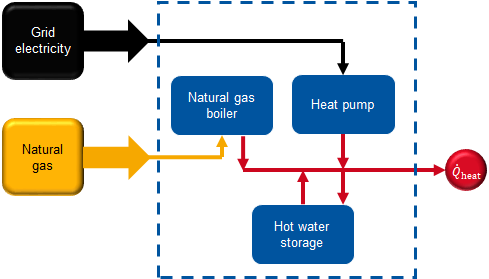


## Preparation

In [1]:
!pip install gurobipy==10.0.0
!pip install pyomo==6.6.2
!pip install numpy==1.24.3
!pip install pandas==1.3.5
!pip install tsam==2.3.1
!pip install matplotlib
!pip install july


ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\eva-m\\Documents\\Uni\\SS2024\\ModE\\programmieren\\venv_mode\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl (8.0 MB)

ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\eva-m\\Documents\\Uni\\SS2024\\ModE\\programmieren\\venv_mode\\Lib\\site-packages\\matplotlib\\_c_internal_utils.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp310-cp310-win_amd64.whl (8.0 MB)


In [2]:
from gurobipy import *
from pyomo.environ import *
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tsam.timeseriesaggregation as tsam
#import july
#from july.utils import date_range


## Load time series data

In [28]:
# Time series data of a whole year with hourly resolution
time_series_data =pd.read_csv('Exercise_4_time_series_data.csv', sep=',', index_col=0)

print(time_series_data)


          gas  electricity  heat_demand
                                       
0     0.92749      0.87516     1.331444
1     0.92749      0.63139     1.411063
2     0.92749      0.44239     1.476206
3     0.92749      0.36452     1.483444
4     0.92749      0.39791     1.483444
...       ...          ...          ...
8755  0.89986      1.11131     1.174596
8756  0.89986      1.06055     1.174596
8757  0.89986      1.02769     1.174596
8758  0.89986      1.01621     1.171671
8759  0.89986      0.99631     1.244586

[8760 rows x 3 columns]


In [29]:
# Plot the time series data
plt.figure(figsize=(10, 5))
plt.plot(time_series_data['electricity'], label='Relative electricity price')
plt.plot(time_series_data['heat_demand'], label='Relative heat demand')
plt.plot(time_series_data['gas'], label='Relative gas price')

# Adding title and labels
plt.xlabel('Time step')
plt.ylabel('Relative value')

# Adding legend
plt.legend()

# Show plot
plt.show()

NameError: name 'plt' is not defined

## Time series aggregation

In [30]:
# aggregate time_series_data with the tsam package
noTypicalPeriods = 20
hoursPerPeriod = 24

aggregation = tsam.TimeSeriesAggregation(
        timeSeries                  = time_series_data,
        noTypicalPeriods            = noTypicalPeriods,
        hoursPerPeriod              = hoursPerPeriod,
        clusterMethod               = 'hierarchical',
        resolution                  = 1 
    )
time_series_data = aggregation.createTypicalPeriods()

print(time_series_data)

             electricity       gas  heat_demand
   TimeStep                                    
0  0            0.920725  0.970021     1.458869
   1            0.888270  0.970021     1.466247
   2            0.878768  0.970021     1.466247
   3            0.877978  0.970021     1.466247
   4            0.878245  0.970021     1.466247
...                  ...       ...          ...
19 19           1.131407  1.030643     0.577214
   20           1.016372  1.030643     0.609917
   21           0.955284  1.030643     0.634444
   22           0.935234  1.030643     0.705977
   23           0.855420  1.030643     0.727887

[480 rows x 3 columns]


In [31]:
# Assign labels to each original period            #NEW
typical_days_row = aggregation.clusterOrder
print("Cluster Labels:")
print(typical_days_row)
print(len(typical_days_row))

Cluster Labels:
[ 0  0  2  2  0  0  4  4  4  4  4  9  9  7  4  0  4  4  7  7  4  4  6  6
  6 15 15 15  5  5  5  6 15 15 15 15 15 15 15  8  8  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  8  8  7 15 15  7  7  9  8 18  7  7
  7  7  9  9  1  0  0  0 12 14 14  0  0  0  1  1 14 14  1  1  1  1  1  9
  9  1  1  7  1  7  7  7  7  7  1  7  1  9  8  8 18 18 18 18  9  9 18  1
  1  1  1 14 14 19 19 12 12 19 14 13 19 19  1 19 19 14 14 19 19 19 19 19
 14 14  1 19 19 16 10 11 13 10 10 10 10 19 17 11  3  3  3  3  3 11 11 10
 19 19 19 19 13 13 10 10 10 10 10 13 13 10 10 10 10 10 13 13 19 19 19 10
 10 13 13 10  3  3  3  3 11 11  3  3  3  3  3 11 11  3  3  3  3  3 11 11
  3  3  3  3  3 11 11  3  3  3  3  3 11 11  3  3  3 10 10 11 11  3  3  3
  3 10 13 13 10 10 10 10 10 11 11  3 10  3 10 10 13 13 10  3 10 10 10 13
 13  3  3  3 10 10 16 16 10  3 10 19 19 13 13 19 19  1  1  1  9  9 18 18
  1  1  1  9  9 18 18  1  1  1 16 16 19 12 12 12 12  0 16  2 19 19 19 19
 16 16 12 12 12 12 12 16 16 19 12  

In [32]:
days_yeahr=[i for i in range(1, 366)]  #NEW
print(days_yeahr)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [33]:
typical_days_dict = dict(zip(days_yeahr, typical_days_row))   #NEW
print(typical_days_dict)

{1: 0, 2: 0, 3: 2, 4: 2, 5: 0, 6: 0, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 9, 13: 9, 14: 7, 15: 4, 16: 0, 17: 4, 18: 4, 19: 7, 20: 7, 21: 4, 22: 4, 23: 6, 24: 6, 25: 6, 26: 15, 27: 15, 28: 15, 29: 5, 30: 5, 31: 5, 32: 6, 33: 15, 34: 15, 35: 15, 36: 15, 37: 15, 38: 15, 39: 15, 40: 8, 41: 8, 42: 5, 43: 5, 44: 5, 45: 5, 46: 5, 47: 5, 48: 5, 49: 5, 50: 5, 51: 5, 52: 5, 53: 5, 54: 5, 55: 5, 56: 5, 57: 5, 58: 5, 59: 5, 60: 5, 61: 8, 62: 8, 63: 7, 64: 15, 65: 15, 66: 7, 67: 7, 68: 9, 69: 8, 70: 18, 71: 7, 72: 7, 73: 7, 74: 7, 75: 9, 76: 9, 77: 1, 78: 0, 79: 0, 80: 0, 81: 12, 82: 14, 83: 14, 84: 0, 85: 0, 86: 0, 87: 1, 88: 1, 89: 14, 90: 14, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 9, 97: 9, 98: 1, 99: 1, 100: 7, 101: 1, 102: 7, 103: 7, 104: 7, 105: 7, 106: 7, 107: 1, 108: 7, 109: 1, 110: 9, 111: 8, 112: 8, 113: 18, 114: 18, 115: 18, 116: 18, 117: 9, 118: 9, 119: 18, 120: 1, 121: 1, 122: 1, 123: 1, 124: 14, 125: 14, 126: 19, 127: 19, 128: 12, 129: 12, 130: 19, 131: 14, 132: 13, 133: 19, 134: 19, 1

In [34]:
typical_hours_row =[] #

    
for i in range(1, 366):  #NEW
    #print(i)
    for j in range(24):
        typical_hours_row.append(typical_days_dict[i]*24+j)
        
print(len(typical_hours_row))
print(typical_hours_row)
        

8760
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,

In [35]:
hours_to_typical_days= dict(zip(zahlenreihe,typical_hours_row))  #NEW
print(hours_to_typical_days)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 0, 25: 1, 26: 2, 27: 3, 28: 4, 29: 5, 30: 6, 31: 7, 32: 8, 33: 9, 34: 10, 35: 11, 36: 12, 37: 13, 38: 14, 39: 15, 40: 16, 41: 17, 42: 18, 43: 19, 44: 20, 45: 21, 46: 22, 47: 23, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 48, 73: 49, 74: 50, 75: 51, 76: 52, 77: 53, 78: 54, 79: 55, 80: 56, 81: 57, 82: 58, 83: 59, 84: 60, 85: 61, 86: 62, 87: 63, 88: 64, 89: 65, 90: 66, 91: 67, 92: 68, 93: 69, 94: 70, 95: 71, 96: 0, 97: 1, 98: 2, 99: 3, 100: 4, 101: 5, 102: 6, 103: 7, 104: 8, 105: 9, 106: 10, 107: 11, 108: 12, 109: 13, 110: 14, 111: 15, 112: 16, 113: 17, 114: 18, 115: 19, 116: 20, 117: 21, 118: 22, 119: 23, 120: 0, 121: 1, 122: 2, 123: 3, 124: 4, 125: 5, 126: 6, 127

In [36]:
# print the number of days represented by each typical day
for typical_day in np.arange(noTypicalPeriods):
    print(f"Typical day {typical_day} represents {aggregation.clusterPeriodNoOccur[typical_day]} days in the original time series")
    
# plot the yearly calendar for the typical days
july.heatmap(dates=date_range("2019-01-01", "2019-12-31"),
    data = aggregation.clusterOrder, 
    cmap="Pastel1",
    month_grid=True, 
    horizontal=True,
    value_label=True,
    date_label=False,
    weekday_label=True,
    month_label=True, 
    year_label=True,
    colorbar=False,
    fontfamily="monospace",
    fontsize=9,
    title=None,
    titlesize="large",
    dpi=100)

Typical day 0 represents 24 days in the original time series
Typical day 1 represents 35 days in the original time series
Typical day 2 represents 14 days in the original time series
Typical day 3 represents 43 days in the original time series
Typical day 4 represents 15 days in the original time series
Typical day 5 represents 22 days in the original time series
Typical day 6 represents 4 days in the original time series
Typical day 7 represents 17 days in the original time series
Typical day 8 represents 7 days in the original time series
Typical day 9 represents 16 days in the original time series
Typical day 10 represents 38 days in the original time series
Typical day 11 represents 18 days in the original time series
Typical day 12 represents 15 days in the original time series
Typical day 13 represents 18 days in the original time series
Typical day 14 represents 11 days in the original time series
Typical day 15 represents 12 days in the original time series
Typical day 16 repre

NameError: name 'july' is not defined

In [37]:
# reindex time series to have unique single-dimensional index starting from 0
time_series_data = time_series_data.reset_index()
time_series_data = time_series_data.rename(columns={'level_0': 'typical_day'})
time_series_data.index = np.arange(0, noTypicalPeriods * hoursPerPeriod)
print(time_series_data)

     typical_day  TimeStep  electricity       gas  heat_demand
0              0         0     0.920725  0.970021     1.458869
1              0         1     0.888270  0.970021     1.466247
2              0         2     0.878768  0.970021     1.466247
3              0         3     0.877978  0.970021     1.466247
4              0         4     0.878245  0.970021     1.466247
..           ...       ...          ...       ...          ...
475           19        19     1.131407  1.030643     0.577214
476           19        20     1.016372  1.030643     0.609917
477           19        21     0.955284  1.030643     0.634444
478           19        22     0.935234  1.030643     0.705977
479           19        23     0.855420  1.030643     0.727887

[480 rows x 5 columns]


## Setting up the time series for the optimization model:

In [38]:
average_electricity_price = 70 # [€/MWh]
average_gas_price = 20 # [€/MWh]
average_heat_demand = 5 # [MW]

time_slices = np.array(time_series_data.index)
print(time_slices)


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [39]:
shifted_time_slices = [] # time slice number shifted by 1 to create the storage level constraint
time_slice_weight = []

for typical_period in np.arange(noTypicalPeriods):
    time_slices_within_typical_period = time_series_data[time_series_data.typical_day == typical_period].index
    shifted_time_slices_within_period = np.roll(time_slices_within_typical_period,-1)
    shifted_time_slices.extend(shifted_time_slices_within_period) 
    time_slice_weight.extend(aggregation.clusterPeriodNoOccur[typical_period]*np.ones(len(time_slices_within_typical_period)))
    
print(shifted_time_slices)
print(time_slice_weight)

# weight of each time slice [h]
time_slice_weight = dict(zip(time_slices, time_slice_weight))

# consecutive time slice of each time slice
next_time_slice = dict(zip(time_slices, shifted_time_slices))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 0, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 24, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 48, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 72, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 96, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 120, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 144, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 168, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 192, 217, 218, 219, 220, 221, 222,

In [40]:
#Erstelle das DIctionary für shifted_time_slices für den storage übers ganze Jahr = storage_next_time_slices   #NEW
# Erstellen der Zahlenreihe von 0 bis 8759
zahlenreihe = list(range(0, 8760))

# Erstellen des Dictionaries
storage_next_time_slices = {zahlenreihe[i]: zahlenreihe[(i + 1) % len(zahlenreihe)] for i in range(len(zahlenreihe))}

# Ausgabe des Ergebnisses
print(storage_next_time_slices)
print(zahlenreihe)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [41]:
# gas price of each time slice
gas_price_time_series = dict(zip(time_slices, np.array(time_series_data['gas']*average_gas_price)))

# electricity price of each time slice
electricity_price_time_series = dict(zip(time_slices, np.array(time_series_data['electricity']*average_electricity_price)))

# heat demand of each time slice
heat_demand_time_series = dict(zip(time_slices, np.array(time_series_data['heat_demand']*average_heat_demand)))


## Setting up the model:

In [42]:
model = ConcreteModel()

# declare sets
model.time_slices = set(time_slices)
model.time_slices_through_whole_year = set(zahlenreihe) #NEW

#model.days_yeahr = set(days_yeahr) #NEW

print(model.time_slices)
print(model.time_slices_through_whole_year)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [43]:
# declare decision variables
model.CAPEX = Var(domain=NonNegativeReals) # [€]
model.OPEX = Var(domain=NonNegativeReals) # [€]
model.Q_N_B = Var(domain=NonNegativeReals) # [MW] installed capacity Boiler
model.Q_N_HP = Var(domain=NonNegativeReals) # [MW] installed capacity Heat Pump
model.Q_N_storage = Var(domain=NonNegativeReals) # [MWh] installed capacity of storage 

# declare time dependent decision variables
model.Q_B = Var(model.time_slices, domain=NonNegativeReals) # [MW]
model.Q_HP = Var(model.time_slices, domain=NonNegativeReals) # [MW]
model.Q_storage = Var(model.time_slices, domain=Reals) # [MW] [negative: storage charge, positive: storage discharge]
model.Q_storage_yearly = Var(model.time_slices_through_whole_year, domain=Reals) # [MW] [negative: storage charge, positive: storage discharge] #NEW
model.storage_level = Var(model.time_slices_through_whole_year, domain=NonNegativeReals) # [MWh] #NEW

In [44]:
# declare parameters
i = 0.05
lifetime = 30
model.RBF = ((1 + i) ** lifetime * i) / ((1 + i) ** lifetime - 1)

model.Q_max_B = 10 # [MW] maximal installable capacity of boiler
model.eta_B = 0.9
model.specific_invest_B = 2500 # [€/MW]

model.Q_max_HP = 10 # [MW] maximal installable capacity of heat pump
model.eta_HP = 3
model.specific_invest_HP = 100000 # [€/MW]

model.Q_max_storage = 40 # [MWh] maximal installable capacity of storage
model.storage_loss = 0.01 # [1/h] hourly storage loss
model.specific_invest_storage = 1000 # [€/MWh]


In [45]:
# declare time dependent parameters
model.time_slice_weight = Param(model.time_slices, initialize = time_slice_weight)
model.gas_price = Param(model.time_slices, initialize = gas_price_time_series)
model.electricity_price = Param(model.time_slices, initialize = electricity_price_time_series)
model.Q_demand = Param(model.time_slices, initialize = heat_demand_time_series)


In [46]:
# declare unindexed constraints
model.CAPEX_constraint = Constraint(expr =  model.CAPEX == model.RBF*(
                                        model.Q_N_B * model.specific_invest_B
                                        +  model.Q_N_HP * model.specific_invest_HP
                                        +  model.Q_N_storage * model.specific_invest_storage))

model.OPEX_constraint = Constraint(expr =  model.OPEX == sum(model.gas_price[time_slice] * model.Q_B[time_slice] / model.eta_B * model.time_slice_weight[time_slice] for time_slice in model.time_slices) 
                                   +  sum(model.electricity_price[time_slice] * model.Q_HP[time_slice] / model.eta_HP * model.time_slice_weight[time_slice] for time_slice in model.time_slices))

model.max_capacity_B_constraint = Constraint(expr = model.Q_N_B <= model.Q_max_B)
model.max_capacity_HP_constraint = Constraint(expr = model.Q_N_HP <= model.Q_max_HP)
model.max_capacity_storage_constraint = Constraint(expr = model.Q_N_storage <= model.Q_max_storage)


# declare rules to setup indexed constraints
def energy_balance_constraint_rule(model, time_slice):
    return model.Q_B[time_slice] + model.Q_HP[time_slice] + model.Q_storage[time_slice] == model.Q_demand[time_slice]

def max_Q_B_constraint_rule(model, time_slice):
    return model.Q_B[time_slice] <= model.Q_N_B

def max_Q_HP_constraint_rule(model, time_slice):
    return model.Q_HP[time_slice] <= model.Q_N_HP

def storage_level_constraint_rule(model, time_slice_through_whole_year):      # NEW
    return  (model.storage_level[storage_next_time_slices[time_slice_through_whole_year]] == (
            model.storage_level[time_slice_through_whole_year] * (1-model.storage_loss)
            - model.Q_storage_yearly[time_slice_through_whole_year]) )
    
def storage_level_maximum_constraint_rule(model, time_slice_thourgh_whole_year):     # NEW
    return  (model.storage_level[time_slice_thourgh_whole_year] <= model.Q_N_storage)

def connect_time_slices_rule(model, time_slices_though_whole_year):  # NEW---??
    return model.Q_storage_yearly[time_slices_though_whole_year] == model.Q_storage[hours_to_typical_days[time_slices_though_whole_year]]



# declare indexed constraints
model.energy_balance_constraint = Constraint(model.time_slices, rule=energy_balance_constraint_rule)
model.max_Q_B_constraint = Constraint(model.time_slices, rule=max_Q_B_constraint_rule)
model.max_Q_HP_constraint = Constraint(model.time_slices, rule=max_Q_HP_constraint_rule)
model.storage_level_constraint = Constraint(model.time_slices_through_whole_year, rule=storage_level_constraint_rule)  # NEW     
model.storage_level_maximum_constraint = Constraint(model.time_slices_through_whole_year, rule=storage_level_maximum_constraint_rule)        # NEW
model.connect_time_slices = Constraint(model.time_slices_through_whole_year, rule=connect_time_slices_rule)  # NEW

#es fehlt noch die zuordnung zu den Time slices!!! #NEW

In [47]:
# declare objective
model.total_costs = Objective(expr = model.CAPEX + model.OPEX,
    sense = minimize)

## Solving the problem

In [48]:
SolverFactory('gurobi').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x1
  Lower bound: 943231.0803100552
  Upper bound: 943231.0803100552
  Number of objectives: 1
  Number of constraints: 27725
  Number of variables: 18965
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 18965
  Number of nonzeros: 65648
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination message: Mo

## Show the values of the objective and the variables:

In [49]:
print(f"Total costs = {model.total_costs()} €")
print()
print(f"Q_N_B = {model.Q_N_B()} MW")
print(f"Q_N_HP = {model.Q_N_HP()} MW")
print(f"Q_N_storage = {model.Q_N_storage()} MWh")

Total costs = 943231.0803100552 €

Q_N_B = 9.769049602236963 MW
Q_N_HP = 3.2256864992545675 MW
Q_N_storage = 5.64323088123285 MWh


In [50]:
print(f"CAPEX = {model.CAPEX.value} €")
print(f"OPEX = {model.OPEX.value} €")

CAPEX = 22939.380596861636 €
OPEX = 920291.6997131936 €
